## import library

In [2]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## open csv file as pandas dataframe

In [3]:
signal_df = pd.read_csv('signal_new.csv').drop('entry', axis=1)

In [4]:
background_df = pd.read_csv('background_new.csv').drop('entry', axis=1)

## label 

In [5]:
signal_label = np.ones(398263)
signal_df['label'] = signal_label

In [6]:
background_df['label']=np.zeros(137269)

## dataset sumup

In [7]:
dataset_df = pd.concat([signal_df,background_df], ignore_index=True)
dataset_df

,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,dEtabb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
0,128.748718,1.266521,7,2,135.384552,-0.805419,-0.574222,222.708755,1.975177,0.907259,...,2.923688,2.859488,5.701911,29.570999,0.633291,2.527016,36.154144,0.750850,0.563677,1.0
1,323.834320,1.221307,8,4,78.824593,-1.744408,-0.241483,398.609894,2.956917,1.084536,...,1.669306,0.536129,5.549069,23.957195,-4.069767,2.107588,701.493103,0.054843,0.040889,1.0
2,288.848236,0.858359,4,3,82.293976,1.627124,1.730240,361.573914,2.707124,0.015462,...,0.954234,1.812456,4.562911,28.454098,1.619449,-1.027924,74.807343,0.728906,0.884353,1.0
3,107.835846,0.050859,4,3,17.217613,-3.646276,-2.009611,347.376099,2.877990,0.090561,...,3.567277,2.119354,3.452726,16.632441,-0.966053,-1.661778,25.253466,0.046178,-1.000000,1.0
4,248.304901,0.958807,7,3,28.405352,1.845880,-0.232091,264.869232,3.197687,1.355985,...,1.064546,0.832365,10.167414,50.971561,1.470771,-2.602962,117.226265,0.663049,0.088564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535527,667.028137,1.109031,11,0,157.071304,1.240662,2.938507,729.059326,2.864907,1.235375,...,0.315239,1.585665,6.828758,27.807114,-0.200469,-1.394060,29.178085,0.006265,0.069917,0.0
535528,419.362488,1.109031,9,3,156.225861,1.433436,1.757243,543.777222,2.527981,0.043883,...,0.575097,2.420889,15.599944,76.274765,2.903633,-1.856060,697.902283,0.027318,0.135313,0.0
535529,607.648499,1.189336,9,1,263.931030,1.292060,-2.004730,797.593994,2.442989,0.616640,...,1.081903,1.396448,18.860130,143.125443,1.419641,0.369972,313.828522,0.019559,0.061828,0.0
535530,435.928528,1.266521,10,3,185.856598,-2.017686,-2.084546,834.221619,2.354301,0.451738,...,1.524903,1.770393,8.116883,44.363911,-1.131178,2.052008,76.338470,0.010020,0.319553,0.0


In [8]:
dataset_df['label'].value_counts()

1.0    398263
0.0    137269
Name: label, dtype: int64

## Explore dataset

In [9]:
parameter = ['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4', 'label']

### histrogram density 

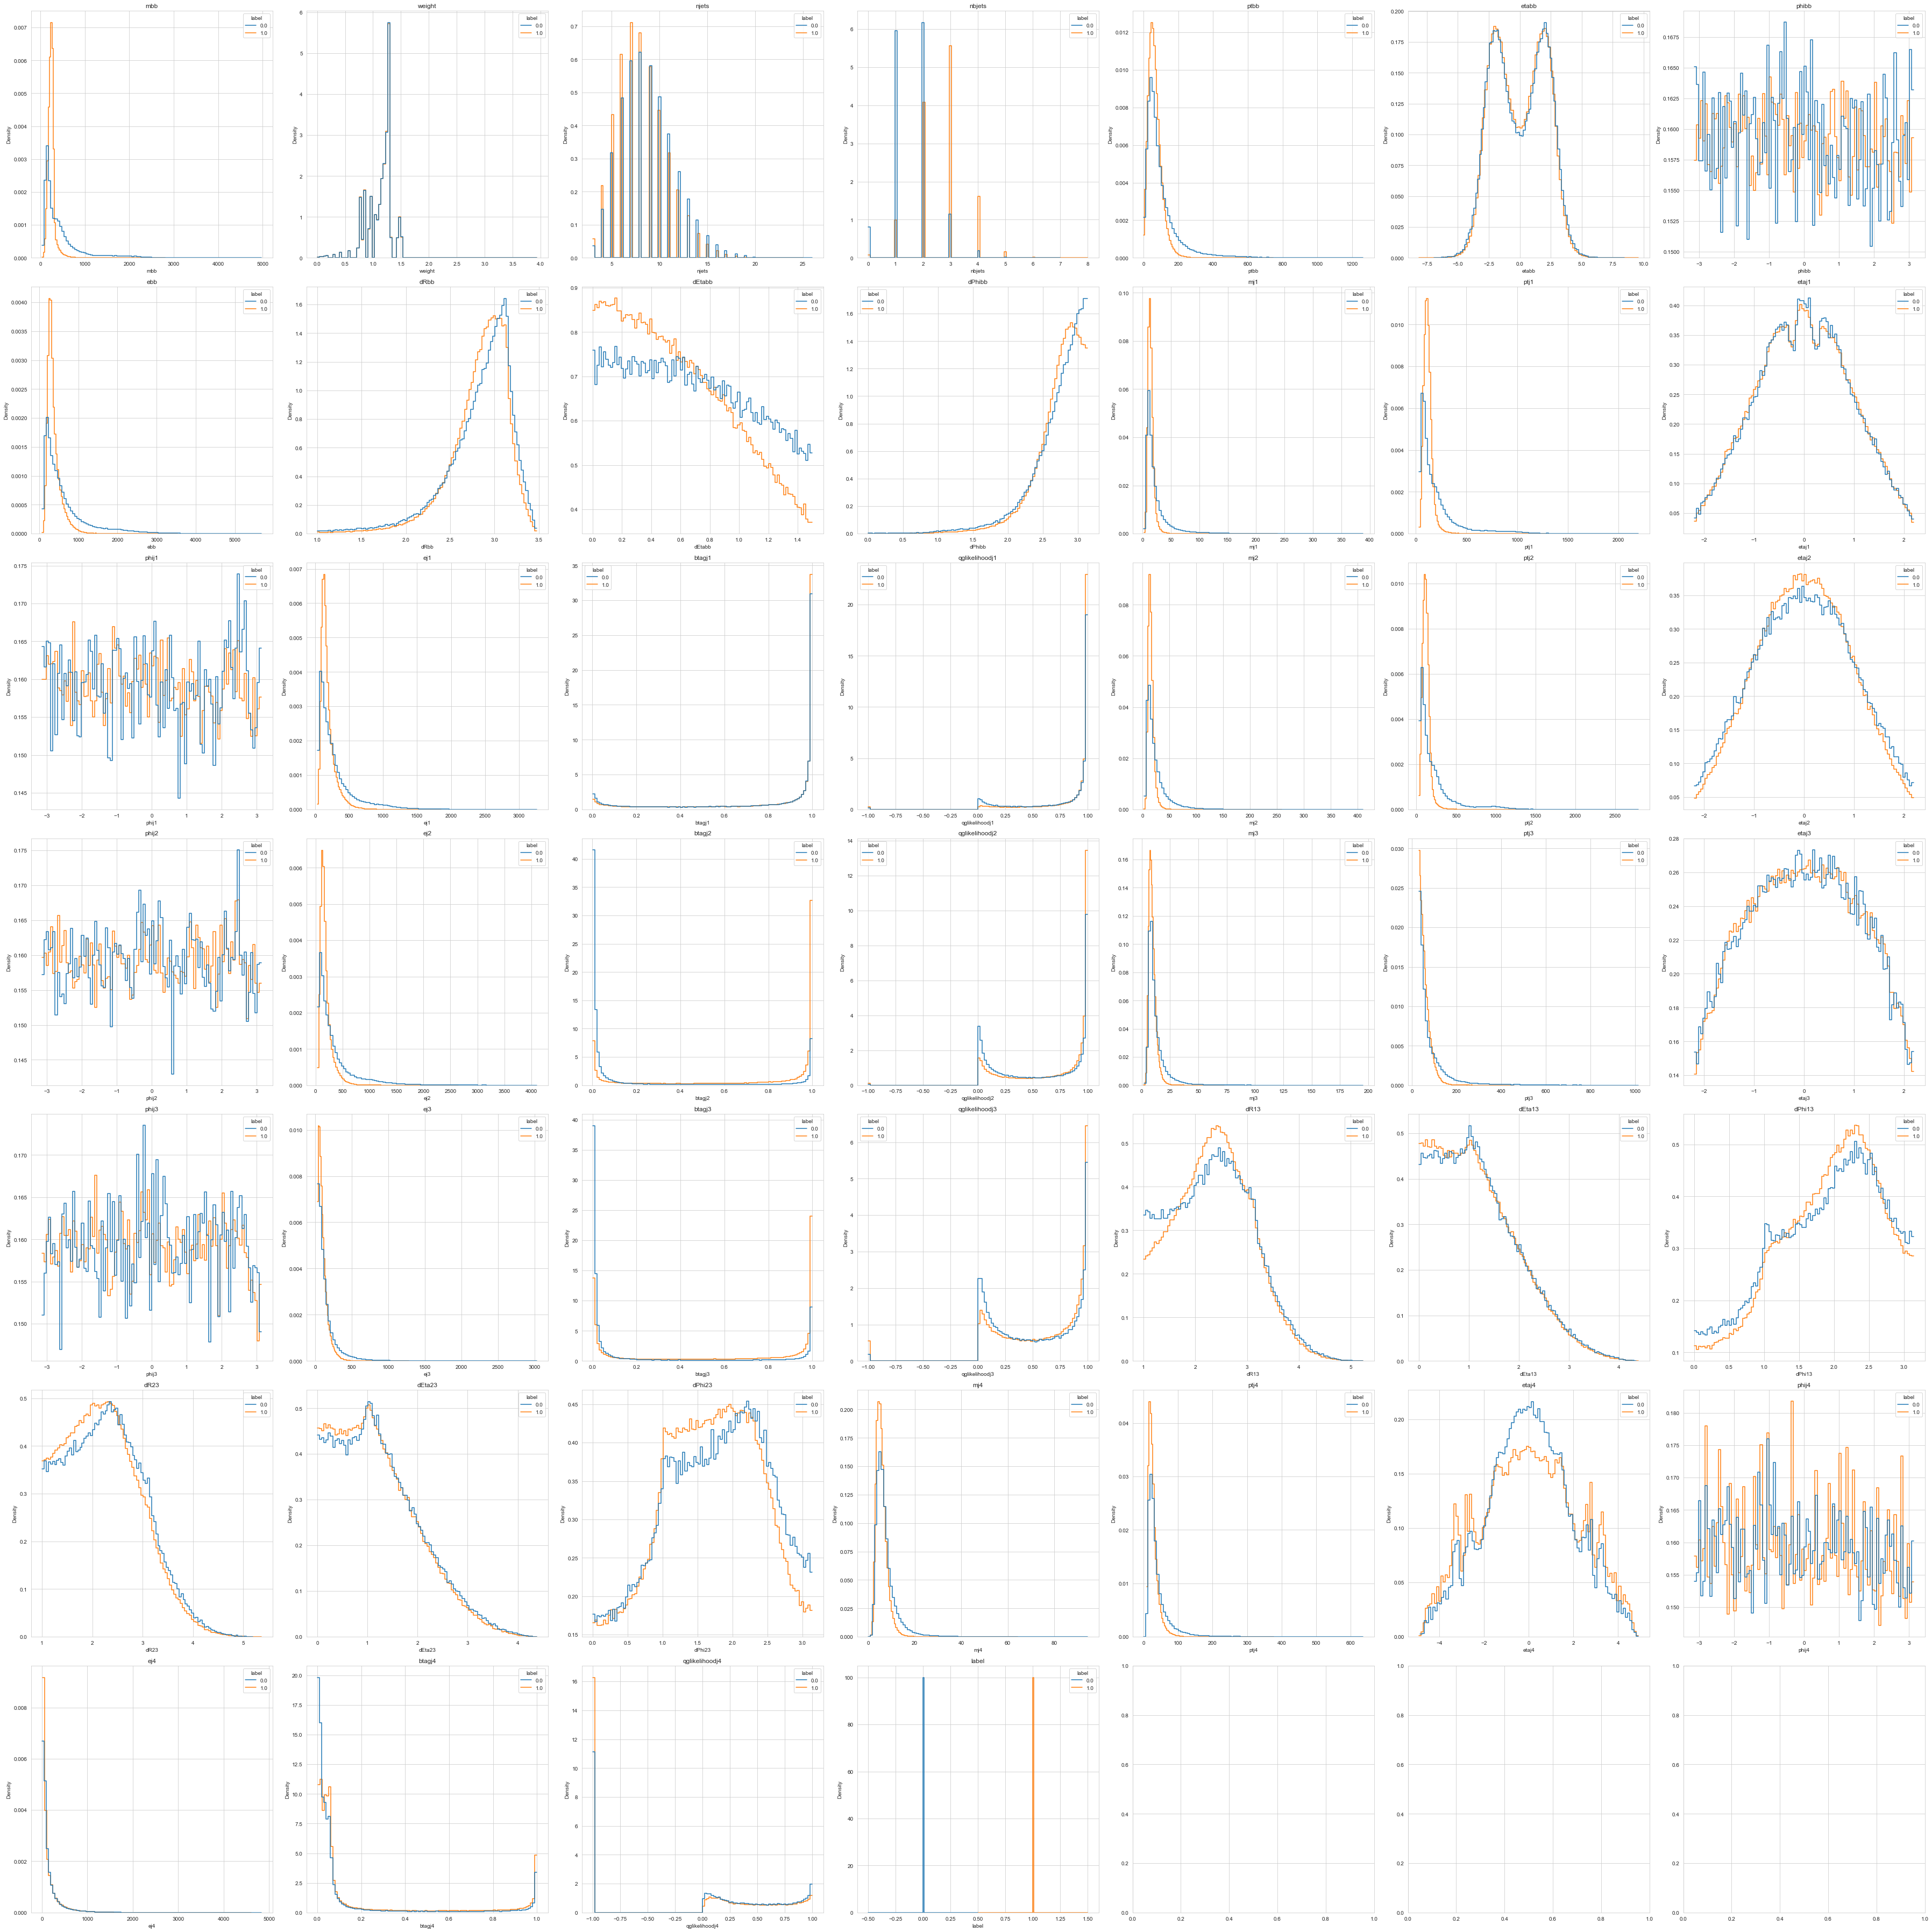

In [9]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

palette ={0.0: "C0", 1.0: "C1"}

for param, ax in zip(parameter, axs.ravel()):

    sns.histplot(ax=ax,  data=dataset_df, x=param, weights='weight', bins=100, common_bins=False, stat='density', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    ax.set_title(param)
    #ax.set_ylabel('density')
    #ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_density.png')

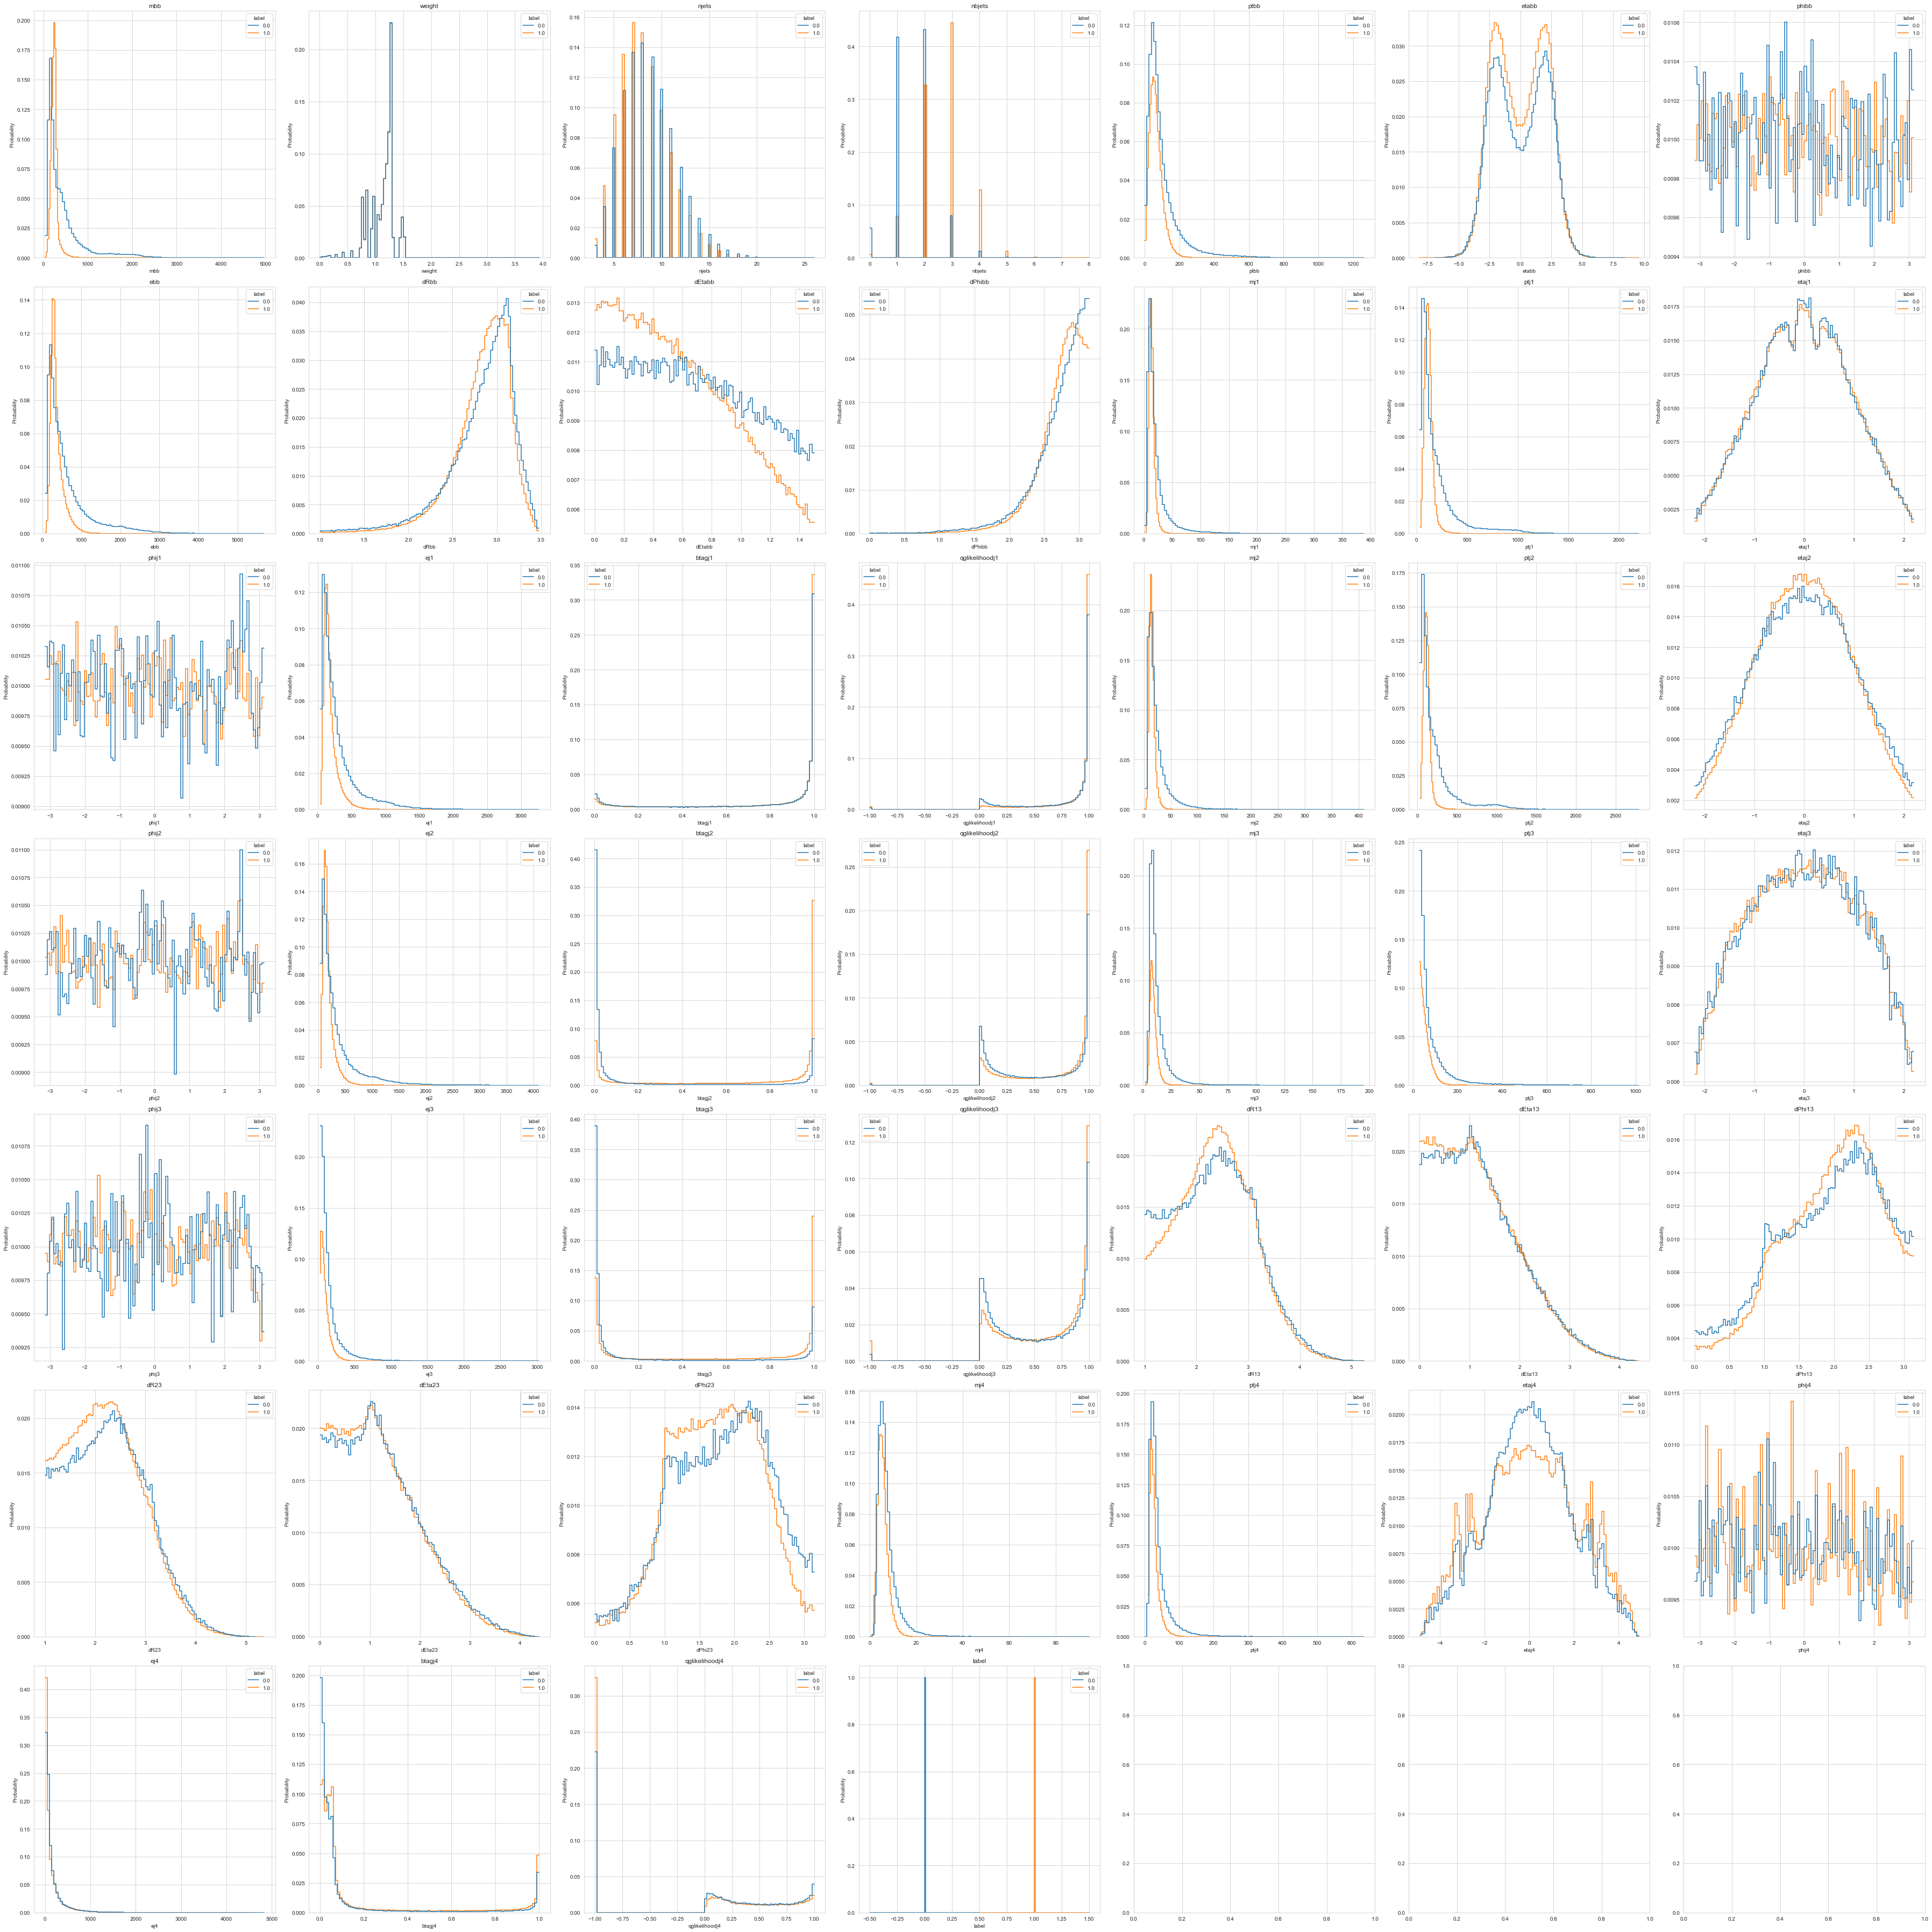

In [26]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

palette ={0.0: "C0", 1.0: "C1"}

for param, ax in zip(parameter, axs.ravel()):

    sns.histplot(ax=ax,  data=dataset_df, x=param, weights='weight', bins=100, common_bins=False, stat='probability', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    ax.set_title(param)
    #ax.set_ylabel('density')
    #ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_probability.png')

### histrogram yscale=log density

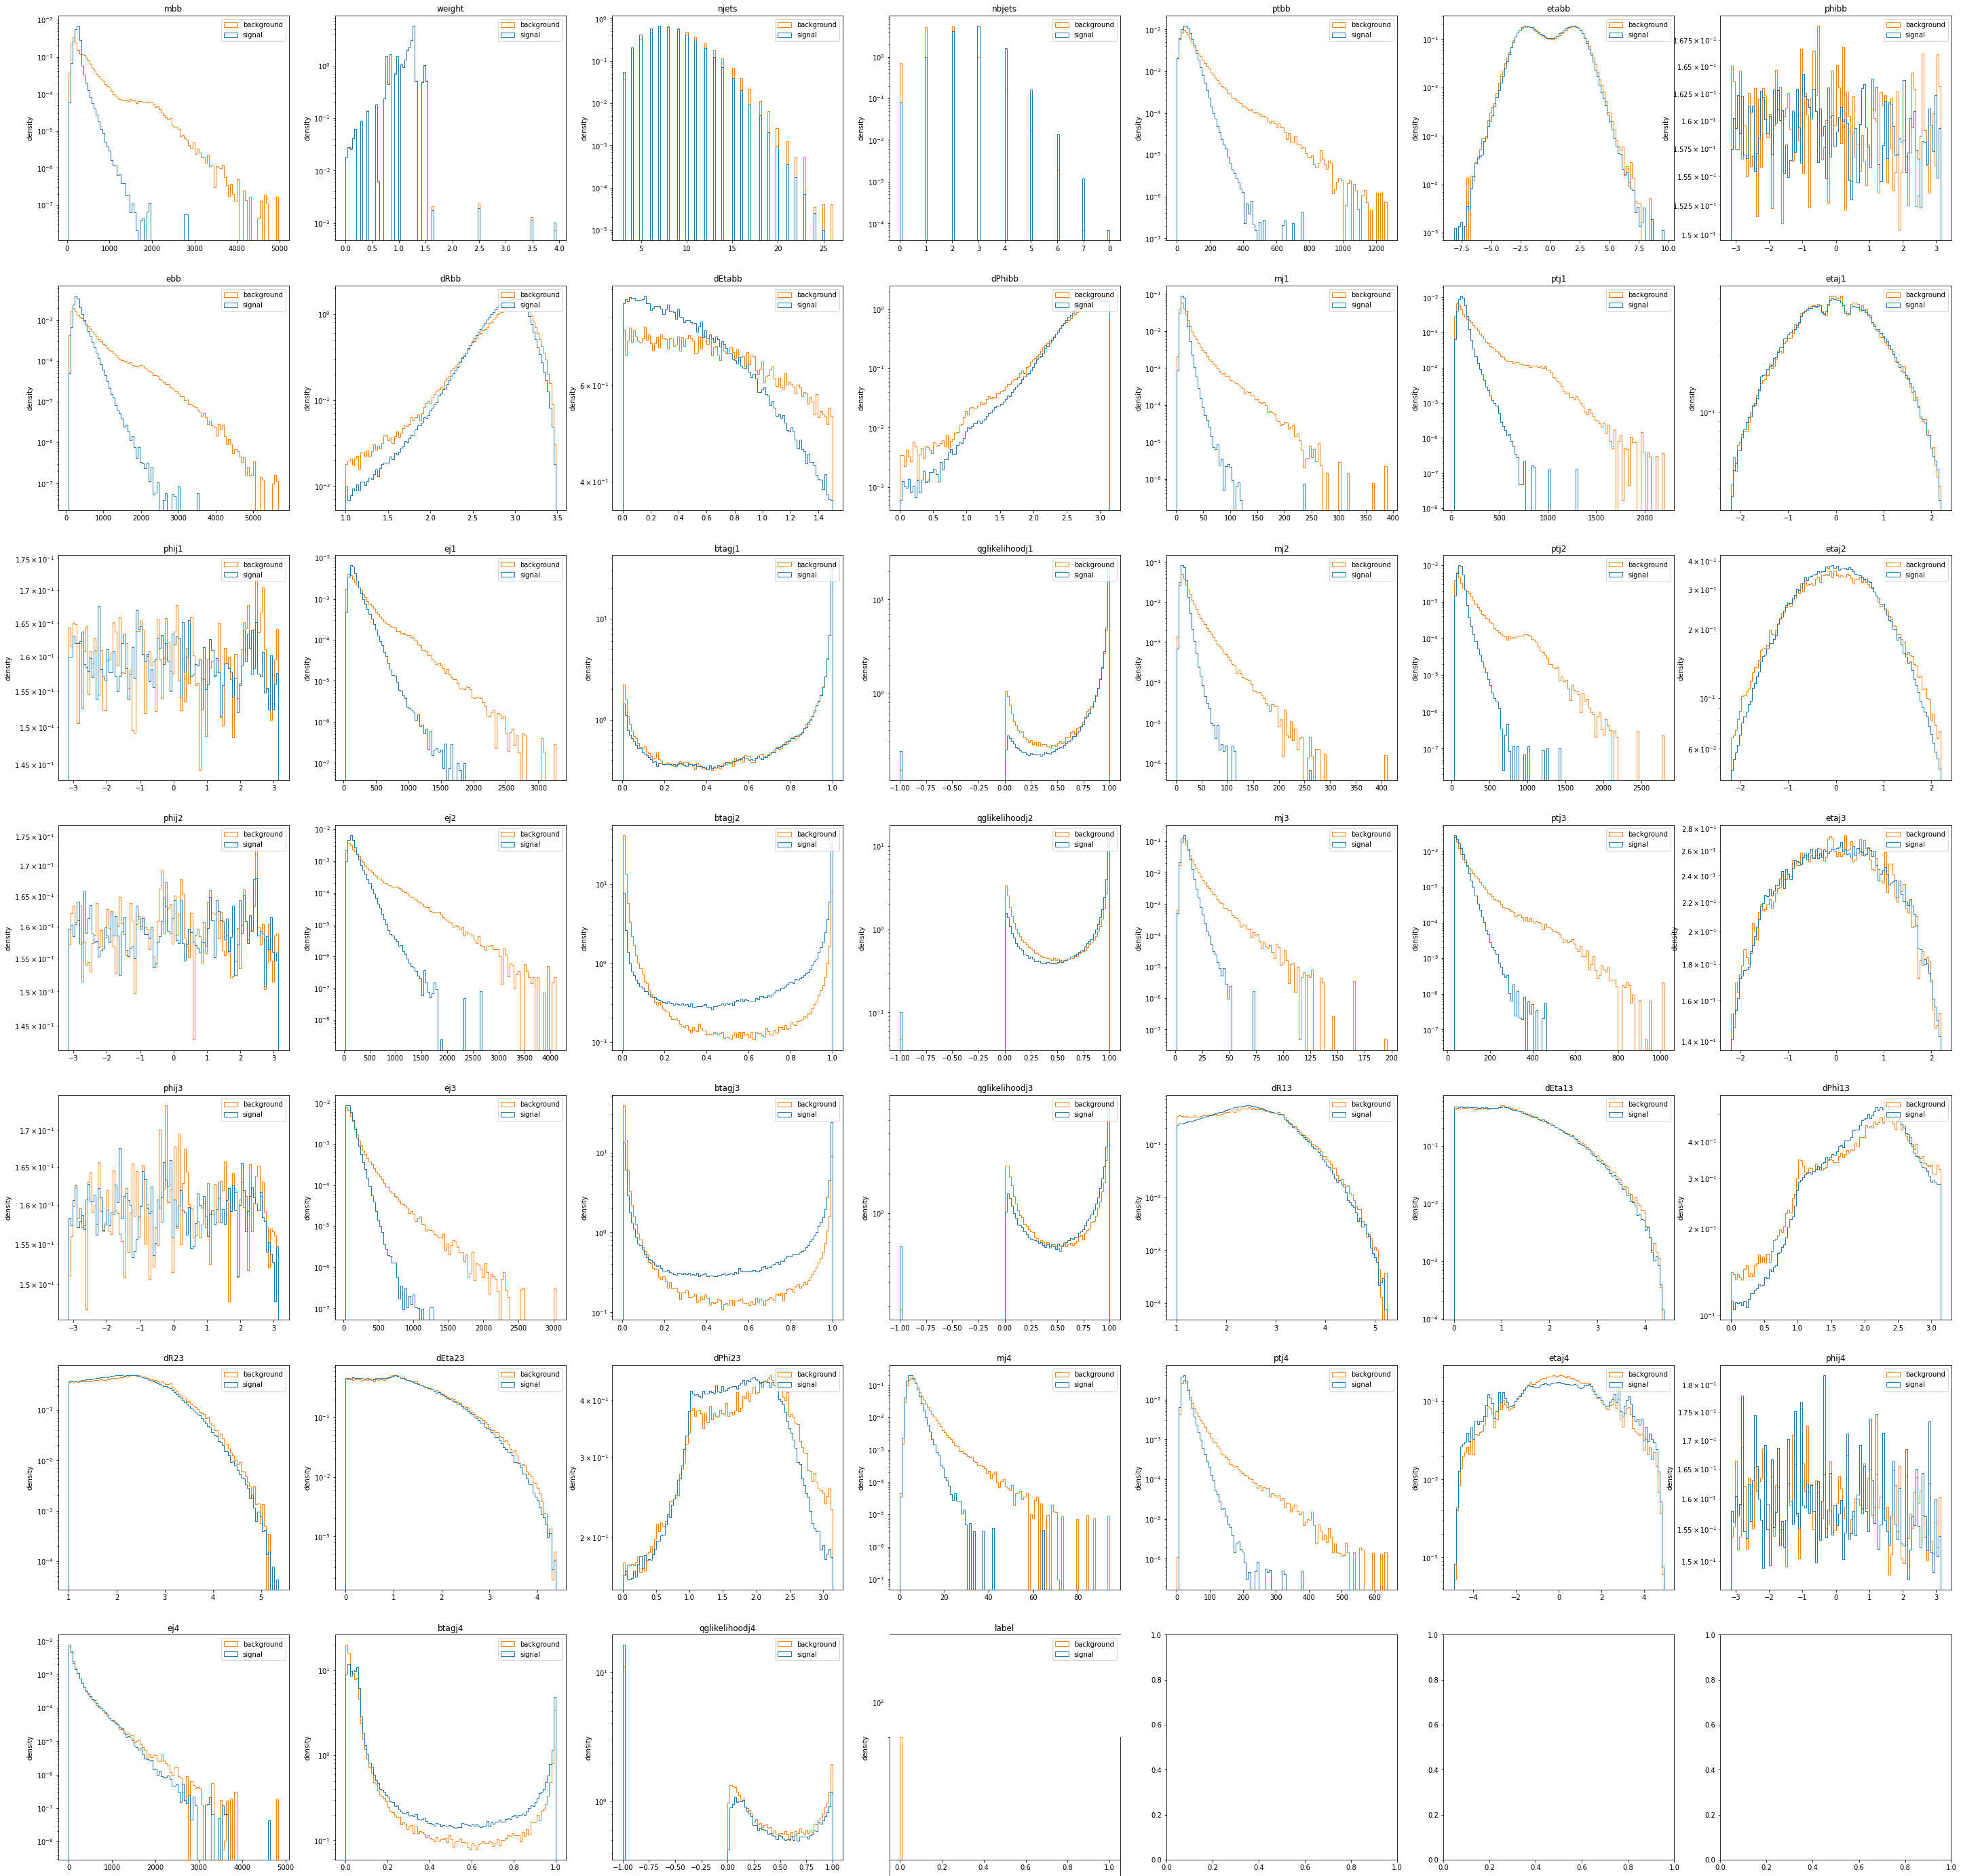

In [12]:
fig1, axs1 = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

for param, ax in zip(parameter, axs1.ravel()):
    
    ax.hist([signal_df[param], background_df[param]], bins=100, density=True, weights=[signal_df['weight'],background_df['weight']], histtype='step', label=['signal','background'])
    ax.set_title(param)
    ax.set_yscale('log')
    ax.set_ylabel('density')
    ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_yscale=log_density.png')

### boxplot of signal (400k events) & background (100k events)

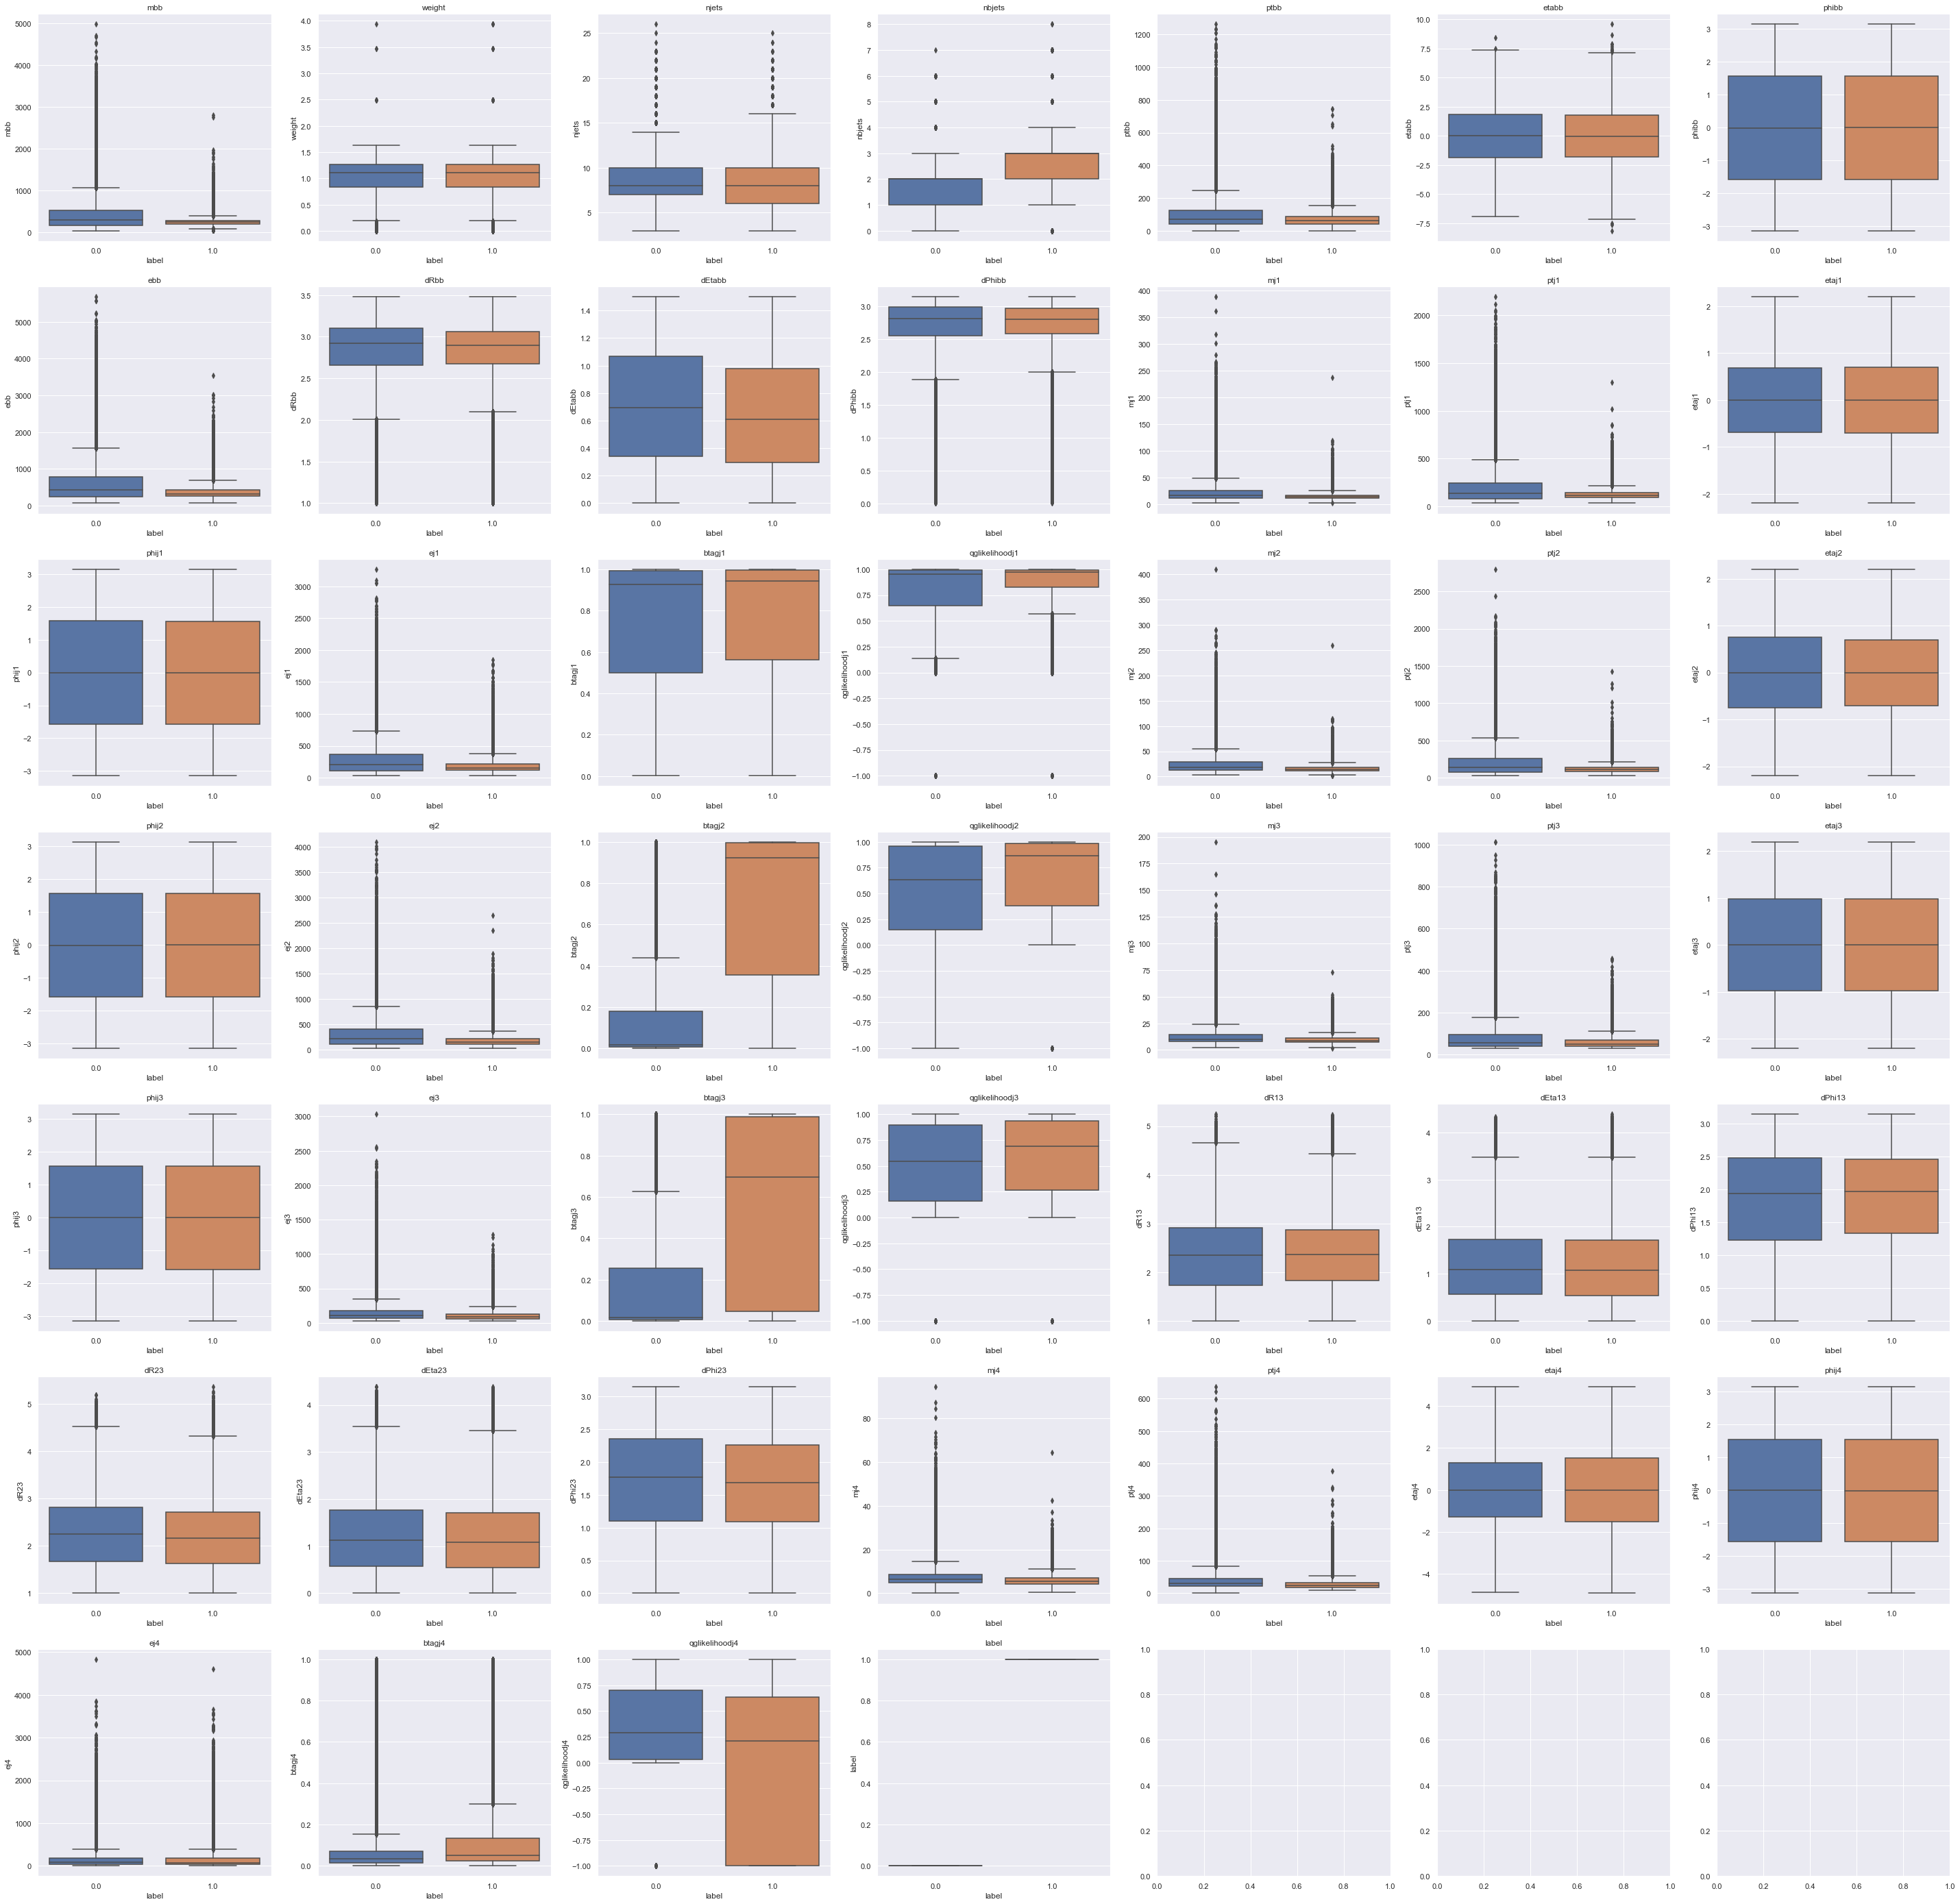

In [13]:
sns.set()

fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

for param, ax in zip(parameter, axs.ravel()):
    
    sns.boxplot(ax=ax, x='label', y=param, data=dataset_df)

    ax.set_title(param)

#plt.savefig('boxplots.png')

In [9]:
dataset_df.columns

Index(['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4', 'label'],
      dtype='object')

## Scaling 

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Standardize 

In [11]:
scaler = StandardScaler()
data_for_scaling = dataset_df.values[:,:-1]
dataset_st_np = scaler.fit_transform(data_for_scaling)
dataset_st_df = pd.DataFrame(dataset_st_np, columns=['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4'])

In [12]:
dataset_st_df['label'] = dataset_df['label']

### Normalize 

In [12]:
scaler1 = MinMaxScaler()
data_for_scaling1 = dataset_df.iloc[:,:-1].to_numpy()
dataset_mm_np = scaler.fit_transform(data_for_scaling)
dataset_mm_df = pd.DataFrame(dataset_mm_np, columns=['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4'])

In [13]:
dataset_mm_df['label']=dataset_df['label']

In [13]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [14]:
from sklearn.metrics import roc_curve

In [15]:
#input_columns = ['ptbb','ebb','mbb','etabb','phibb','ptj1','ej1','etaj1','btagj1','ptj2','ej2','etaj2','btagj2']
input_columns = ['mbb','nbjets','dEtabb','ej1','ej2','btagj2','qglikelihoodj2','mj3','btagj3','mj4']

### Splitting data

In [16]:
def TrainTestSplit(dataset):
    return train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['label'].to_numpy())

In [17]:
train_df, test_df = TrainTestSplit(dataset_st_df)

In [18]:
X_test = test_df[input_columns]
y_test = test_df['label']

In [19]:
train_df['label'].value_counts()

1.0    278784
0.0     96088
Name: label, dtype: int64

In [20]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_X_train = undersampled_train[input_columns]
undersampled_y_train = undersampled_train['label']

In [21]:
# Instantiate a sequential model
model = Sequential()

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

# Add input and hidden layer
model.add(Dense(100, activation='relu', input_shape=(10,)))
model.add(Dense(50, activation='relu'))

# Add output layer, use sigmoid
model.add(Dense(1, activation='sigmoid'))

#Compile
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy','AUC']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(undersampled_X_train, undersampled_y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

Epoch 1/10
6006/6006 [==============================] - 20s 3ms/step - loss: 0.3829 - accuracy: 0.8244 - auc: 0.9086 - val_loss: 0.3583 - val_accuracy: 0.8395 - val_auc: 0.9209
Epoch 2/10
6006/6006 [==============================] - 10s 2ms/step - loss: 0.3459 - accuracy: 0.8485 - auc: 0.9268 - val_loss: 0.3448 - val_accuracy: 0.8477 - val_auc: 0.9314
Epoch 3/10
6006/6006 [==============================] - 10s 2ms/step - loss: 0.3259 - accuracy: 0.8598 - auc: 0.9352 - val_loss: 0.3273 - val_accuracy: 0.8551 - val_auc: 0.9368
Epoch 4/10
6006/6006 [==============================] - 10s 2ms/step - loss: 0.3156 - accuracy: 0.8645 - auc: 0.9390 - val_loss: 0.3066 - val_accuracy: 0.8683 - val_auc: 0.9396
Epoch 5/10
6006/6006 [==============================] - 36s 6ms/step - loss: 0.3106 - accuracy: 0.8664 - auc: 0.9408 - val_loss: 0.3023 - val_accuracy: 0.8693 - val_auc: 0.9409
Epoch 6/10
6006/6006 [==============================] - 32s 5ms/step - loss: 0.3075 - accuracy: 0.8673 - auc: 0.942

In [28]:
plt.rcParams.update({'font.size': 16})

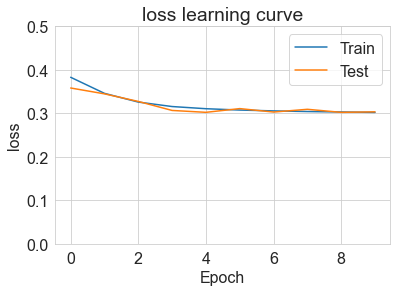

In [29]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,0.5)
plt.title('loss learning curve')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

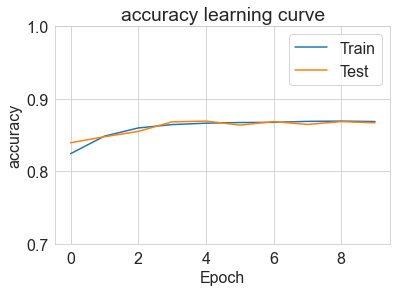

In [30]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.7,1)
plt.title('accuracy learning curve')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

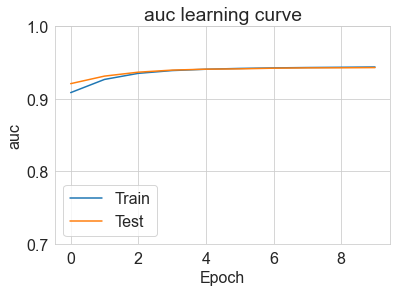

In [31]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.ylim(0.7,1)
plt.title('auc learning curve')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Feature importance

In [70]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
def create_model(node1=100, node2=50, activation='relu', optimizer='sgd'):
    # Create model
    model = Sequential()
    model.add(Dense(node1, activation=activation, input_shape=(10,)))
    model.add(Dense(node2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [72]:
NN = KerasClassifier(build_fn = create_model)

In [70]:
NN.fit(undersampled_X_train, undersampled_y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

Epoch 1/10
6006/6006 [==============================] - 29s 5ms/step - loss: 0.3774 - accuracy: 0.8292 - val_loss: 0.3483 - val_accuracy: 0.8417
Epoch 2/10
6006/6006 [==============================] - 23s 4ms/step - loss: 0.3444 - accuracy: 0.8489 - val_loss: 0.3376 - val_accuracy: 0.8488
Epoch 3/10
6006/6006 [==============================] - 26s 4ms/step - loss: 0.3264 - accuracy: 0.8589 - val_loss: 0.3236 - val_accuracy: 0.8574
Epoch 4/10
6006/6006 [==============================] - 28s 5ms/step - loss: 0.3166 - accuracy: 0.8631 - val_loss: 0.3286 - val_accuracy: 0.8550
Epoch 5/10
6006/6006 [==============================] - 30s 5ms/step - loss: 0.3116 - accuracy: 0.8655 - val_loss: 0.3192 - val_accuracy: 0.8595
Epoch 6/10
6006/6006 [==============================] - 33s 5ms/step - loss: 0.3084 - accuracy: 0.8670 - val_loss: 0.2902 - val_accuracy: 0.8746
Epoch 7/10
6006/6006 [==============================] - 30s 5ms/step - loss: 0.3063 - accuracy: 0.8678 - val_loss: 0.3108 - val_ac

In [71]:
from sklearn.inspection import permutation_importance

In [72]:
result = permutation_importance(NN, X_test, y_test, random_state=42, scoring='accuracy')

In [73]:
result.importances_mean

array([0.06858583, 0.01435205, 0.0020254 , 0.00381302, 0.011393  ,
       0.0683406 , 0.00055023, 0.00296527, 0.01790365, 0.00635753])

In [74]:
result.importances_std

array([5.12848093e-04, 6.30132873e-04, 2.43262025e-04, 2.76617840e-04,
       2.96544491e-04, 1.07337825e-03, 1.71529559e-04, 9.42815697e-05,
       6.23509587e-04, 1.40322288e-04])

In [75]:
result.importances

array([[0.0677829 , 0.06927673, 0.06844267, 0.06897797, 0.0684489 ],
       [0.01528072, 0.01424748, 0.01438441, 0.0145338 , 0.01331383],
       [0.00191087, 0.00171791, 0.00245861, 0.00203535, 0.00200423],
       [0.00384041, 0.00373459, 0.00367235, 0.00431968, 0.00349807],
       [0.01158347, 0.01088012, 0.01139674, 0.01176397, 0.01134072],
       [0.07016681, 0.06894062, 0.06730985, 0.06776422, 0.06752147],
       [0.00034234, 0.00077182, 0.00035479, 0.00063488, 0.00064733],
       [0.00303125, 0.00285697, 0.00306237, 0.00303125, 0.00284452],
       [0.01803187, 0.01859828, 0.0180132 , 0.01814391, 0.01673098],
       [0.00628034, 0.00629279, 0.00662891, 0.00634881, 0.00623677]])

In [81]:
featimp = pd.DataFrame(result.importances_mean, columns=['importances_mean'])
featimp['feature_name']=input_columns
featimp

,importances_mean,feature_name
0,0.068586,mbb
1,0.014352,nbjets
2,0.002025,dEtabb
3,0.003813,ej1
4,0.011393,ej2
5,0.068341,btagj2
6,0.000550,qglikelihoodj2
7,0.002965,mj3
8,0.017904,btagj3
9,0.006358,mj4


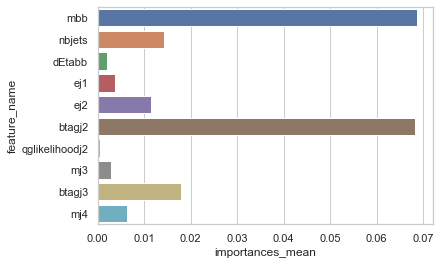

In [82]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="importances_mean", y="feature_name", data=featimp)

In [85]:
input_columns=['mbb','btagj2','btagj3']

In [93]:
X_test_new = test_df[input_columns]
y_test_new = test_df['label']

In [87]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
X_train_new = undersampled_train[input_columns]
y_train_new = undersampled_train['label']

In [96]:
# Instantiate a sequential model
model_new = Sequential()

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

# Add input and hidden layer
model_new.add(Dense(100, activation='relu', input_shape=(3,)))
model_new.add(Dense(50, activation='relu'))

# Add output layer, use sigmoid
model_new.add(Dense(1, activation='sigmoid'))

#Compile
model_new.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy','AUC']
             )
model_new.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 100)               400       
_________________________________________________________________
dense_145 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 51        
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [97]:
history_new = model_new.fit(X_train_new, y_train_new, validation_data=(X_test_new, y_test_new), epochs=10, callbacks=[early_stopping])

Epoch 1/10
6006/6006 [==============================] - 30s 5ms/step - loss: 0.4040 - accuracy: 0.8098 - auc: 0.8983 - val_loss: 0.3591 - val_accuracy: 0.8432 - val_auc: 0.9207
Epoch 2/10
6006/6006 [==============================] - 29s 5ms/step - loss: 0.3523 - accuracy: 0.8425 - auc: 0.9245 - val_loss: 0.3449 - val_accuracy: 0.8507 - val_auc: 0.9275
Epoch 3/10
6006/6006 [==============================] - 25s 4ms/step - loss: 0.3411 - accuracy: 0.8479 - auc: 0.9285 - val_loss: 0.3454 - val_accuracy: 0.8485 - val_auc: 0.9290
Epoch 4/10
6006/6006 [==============================] - 23s 4ms/step - loss: 0.3371 - accuracy: 0.8498 - auc: 0.9299 - val_loss: 0.3256 - val_accuracy: 0.8597 - val_auc: 0.9302
Epoch 5/10
6006/6006 [==============================] - 24s 4ms/step - loss: 0.3350 - accuracy: 0.8504 - auc: 0.9306 - val_loss: 0.3248 - val_accuracy: 0.8593 - val_auc: 0.9310
Epoch 6/10
6006/6006 [==============================] - 24s 4ms/step - loss: 0.3336 - accuracy: 0.8509 - auc: 0.931

In [98]:
input_columns=['nbjets', 'ej1', 'dEtabb']

In [99]:
X_test_new1 = test_df[input_columns]
y_test_new1 = test_df['label']

In [100]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
X_train_new1 = undersampled_train[input_columns]
y_train_new1 = undersampled_train['label']

In [101]:
history_new = model_new.fit(X_train_new1, y_train_new1, validation_data=(X_test_new1, y_test_new1), epochs=10, callbacks=[early_stopping])

Epoch 1/10
6006/6006 [==============================] - 20s 3ms/step - loss: 0.4871 - accuracy: 0.7639 - auc: 0.8459 - val_loss: 0.4797 - val_accuracy: 0.7532 - val_auc: 0.8530
Epoch 2/10
6006/6006 [==============================] - 21s 3ms/step - loss: 0.4738 - accuracy: 0.7717 - auc: 0.8534 - val_loss: 0.4834 - val_accuracy: 0.7562 - val_auc: 0.8542
Epoch 3/10
6006/6006 [==============================] - 25s 4ms/step - loss: 0.4723 - accuracy: 0.7733 - auc: 0.8545 - val_loss: 0.4787 - val_accuracy: 0.7575 - val_auc: 0.8545
Epoch 4/10
6006/6006 [==============================] - 23s 4ms/step - loss: 0.4720 - accuracy: 0.7723 - auc: 0.8546 - val_loss: 0.4594 - val_accuracy: 0.7749 - val_auc: 0.8549
Epoch 5/10
6006/6006 [==============================] - 27s 4ms/step - loss: 0.4717 - accuracy: 0.7731 - auc: 0.8548 - val_loss: 0.4783 - val_accuracy: 0.7659 - val_auc: 0.8549
Epoch 6/10
6006/6006 [==============================] - 25s 4ms/step - loss: 0.4715 - accuracy: 0.7731 - auc: 0.854

In [65]:
param_grid = {'node1':[50, 100, 200],
              'node2':[25, 50, 100], 
              'activation':['relu', 'tanh', 'softplus'], 
              'optimizer':['adam', 'sgd', 'rmsprop']
             }

In [67]:
model_cv = GridSearchCV(estimator=NN, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
model_cv.fit(undersampled_X_train, undersampled_y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

Epoch 1/10
3003/3003 [==============================] - 22s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 10.0628 - val_accuracy: 0.2563
Epoch 2/10
3003/3003 [==============================] - 19s 6ms/step - loss: 2.7844e-06 - accuracy: 1.0000 - val_loss: 11.9540 - val_accuracy: 0.2563
Epoch 3/10
3003/3003 [==============================] - 20s 7ms/step - loss: 3.9475e-07 - accuracy: 1.0000 - val_loss: 13.5457 - val_accuracy: 0.2563
Epoch 4/10
3003/3003 [==============================] - 20s 7ms/step - loss: 7.0026e-08 - accuracy: 1.0000 - val_loss: 15.0654 - val_accuracy: 0.2563
Epoch 5/10
3003/3003 [==============================] - 21s 7ms/step - loss: 1.3702e-08 - accuracy: 1.0000 - val_loss: 16.4825 - val_accuracy: 0.2563
Epoch 6/10
3003/3003 [==============================] - 21s 7ms/step - loss: 3.0458e-09 - accuracy: 1.0000 - val_loss: 17.7504 - val_accuracy: 0.2563
Epoch 7/10
3003/3003 [==============================] - 21s 7ms/step - loss: 8.0542e-10 - accuracy: 1.00

KeyboardInterrupt: 

# Boosted Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
clf = DecisionTreeClassifier()

In [62]:
clf.fit(undersampled_X_train.values, undersampled_y_train)

DecisionTreeClassifier()

In [63]:
BDT = AdaBoostClassifier(base_estimator=clf, n_estimators=100)

In [66]:
BDT.fit(undersampled_X_train.values, undersampled_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [67]:
BDT.predict(X_test.values)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 1., ..., 0., 1., 1.])

# 00000000000000000000000

In [56]:
def plot_auc(y_pred1, y_pred2, est1, est2):
    fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    plt.plot(fpr1, tpr1)
    plt.plot(fpr2, tpr2)
    display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name= est1)
    display1.plot()
    display2 = metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name= est2)
    display2.plot()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

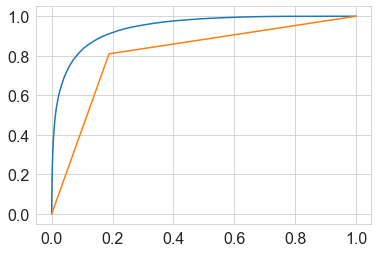

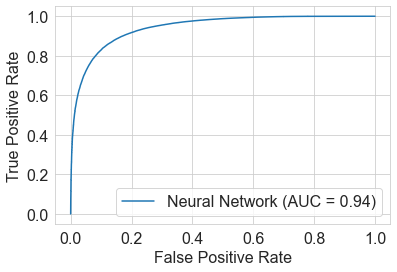

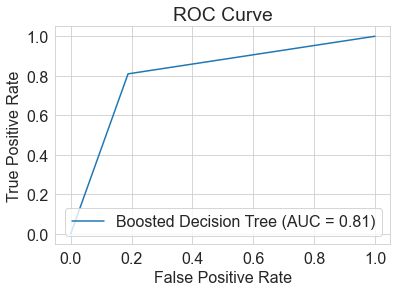

In [57]:
plot_auc(y_pred, y_pred_proba, 'Neural Network', 'Boosted Decision Tree')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


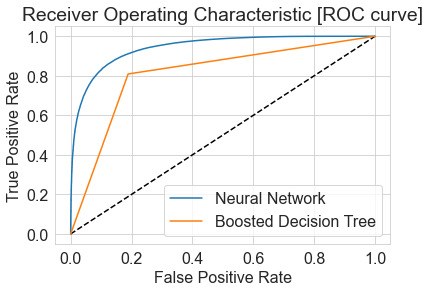

In [69]:
y_pred_prob_NN = model.predict(X_test.values)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_NN)

y_pred_prob_BDT = BDT.predict_proba(X_test.values)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob_BDT)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Neural Network")
plt.plot(fpr2, tpr2, label= "Boosted Decision Tree")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic [ROC curve]')
plt.show()